### 연도별 출생건수와 사망건수의 차이와, 혼인건수와 이혼건수의 차이 변화

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [330]:
data = pd.read_csv('인구동태.csv', engine='python')

In [331]:
data.head()

,행정구역별,항목,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,부산광역시,출생건수 (명),"40,877","35,481","30,472","29,839","27,993","25,464","25,678","28,223","26,670","25,110","27,414","27,759","28,673","25,831","26,190","26,645","24,906","21,480"
1,부산광역시,조출생률 (천명당),10.7,9.4,8.1,8,7.6,7,7.1,7.8,7.5,7.1,7.8,7.9,8.2,7.4,7.5,7.7,7.2,6.2
2,부산광역시,사망건수 (명),"18,177","18,283","18,539","18,401","18,596","18,727","18,862","19,072","19,385","18,954","19,708","19,643","20,534","20,096","20,230","20,820","21,074","21,434"
3,부산광역시,조사망률 (천명당),4.8,4.8,4.9,5,5.1,5.1,5.2,5.3,5.4,5.3,5.6,5.6,5.9,5.8,5.8,6,6.1,6.2
4,부산광역시,자연증가건수 (명),"22,700","17,198","11,933","11,438","9,397","6,737","6,816","9,151","7,285","6,156","7,706","8,116","8,139","5,735","5,960","5,825","3,832",46


In [332]:
dlist = data['항목'].drop_duplicates().tolist()

In [333]:
dlist

['출생건수 (명)',
 '조출생률 (천명당)',
 '사망건수 (명)',
 '조사망률 (천명당)',
 '자연증가건수 (명)',
 '자연증가율 (천명당)',
 '혼인건수 (건)',
 '조혼인율 (천명당)',
 '이혼건수 (건)',
 '조이혼율 (천명당)']

In [334]:
dlist = [item for item in dlist if item not in ['조출생률 (천명당)','조사망률 (천명당)','조혼인율 (천명당)','조이혼율 (천명당)']]

In [335]:
dlist

['출생건수 (명)', '사망건수 (명)', '자연증가건수 (명)', '자연증가율 (천명당)', '혼인건수 (건)', '이혼건수 (건)']

In [336]:
df = data[data['항목'].isin(dlist)]

In [337]:
df.head()

,행정구역별,항목,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,부산광역시,출생건수 (명),"40,877","35,481","30,472","29,839","27,993","25,464","25,678","28,223","26,670","25,110","27,414","27,759","28,673","25,831","26,190","26,645","24,906","21,480"
2,부산광역시,사망건수 (명),"18,177","18,283","18,539","18,401","18,596","18,727","18,862","19,072","19,385","18,954","19,708","19,643","20,534","20,096","20,230","20,820","21,074","21,434"
4,부산광역시,자연증가건수 (명),"22,700","17,198","11,933","11,438","9,397","6,737","6,816","9,151","7,285","6,156","7,706","8,116","8,139","5,735","5,960","5,825","3,832",46
5,부산광역시,자연증가율 (천명당),6,4.5,3.2,3.1,2.6,1.8,1.9,2.5,2,1.7,2.2,2.3,2.3,1.6,1.7,1.7,1.1,0
6,부산광역시,혼인건수 (건),"23,343","21,825","20,916","20,027","19,898","18,973","20,017","21,484","20,149","18,614","20,195","20,224","20,362","20,734","18,927","18,553","17,113","15,677"


In [338]:
df = df[df['행정구역별'] == '부산광역시']

In [339]:
df

,행정구역별,항목,2000년,2001년,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,부산광역시,출생건수 (명),"40,877","35,481","30,472","29,839","27,993","25,464","25,678","28,223","26,670","25,110","27,414","27,759","28,673","25,831","26,190","26,645","24,906","21,480"
2,부산광역시,사망건수 (명),"18,177","18,283","18,539","18,401","18,596","18,727","18,862","19,072","19,385","18,954","19,708","19,643","20,534","20,096","20,230","20,820","21,074","21,434"
4,부산광역시,자연증가건수 (명),"22,700","17,198","11,933","11,438","9,397","6,737","6,816","9,151","7,285","6,156","7,706","8,116","8,139","5,735","5,960","5,825","3,832",46
5,부산광역시,자연증가율 (천명당),6,4.5,3.2,3.1,2.6,1.8,1.9,2.5,2,1.7,2.2,2.3,2.3,1.6,1.7,1.7,1.1,0
6,부산광역시,혼인건수 (건),"23,343","21,825","20,916","20,027","19,898","18,973","20,017","21,484","20,149","18,614","20,195","20,224","20,362","20,734","18,927","18,553","17,113","15,677"
8,부산광역시,이혼건수 (건),"10,129","10,489","12,065","14,120","11,334","9,905","8,953","8,677","7,908","8,550","7,645","7,514","7,501","7,444","7,345","6,649","6,859","6,651"


In [340]:
df1 = df_busan.T
df1

,0,2,4,5,6,8
행정구역별,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시
항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
2000년,"40,877","18,177","22,700",6,"23,343","10,129"
2001년,"35,481","18,283","17,198",4.5,"21,825","10,489"
2002년,"30,472","18,539","11,933",3.2,"20,916","12,065"
2003년,"29,839","18,401","11,438",3.1,"20,027","14,120"
2004년,"27,993","18,596","9,397",2.6,"19,898","11,334"
2005년,"25,464","18,727","6,737",1.8,"18,973","9,905"
2006년,"25,678","18,862","6,816",1.9,"20,017","8,953"
2007년,"28,223","19,072","9,151",2.5,"21,484","8,677"


In [341]:
df1.drop('행정구역별')

,0,2,4,5,6,8
항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
2000년,"40,877","18,177","22,700",6,"23,343","10,129"
2001년,"35,481","18,283","17,198",4.5,"21,825","10,489"
2002년,"30,472","18,539","11,933",3.2,"20,916","12,065"
2003년,"29,839","18,401","11,438",3.1,"20,027","14,120"
2004년,"27,993","18,596","9,397",2.6,"19,898","11,334"
2005년,"25,464","18,727","6,737",1.8,"18,973","9,905"
2006년,"25,678","18,862","6,816",1.9,"20,017","8,953"
2007년,"28,223","19,072","9,151",2.5,"21,484","8,677"
2008년,"26,670","19,385","7,285",2,"20,149","7,908"


In [342]:
df1 = df1.reset_index()


df1

,index,0,2,4,5,6,8
0,행정구역별,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시
1,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
2,2000년,"40,877","18,177","22,700",6,"23,343","10,129"
3,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489"
4,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065"
5,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120"
6,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334"
7,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905"
8,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953"
9,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677"


In [343]:
df1.columns

Index(['index', 0, 2, 4, 5, 6, 8], dtype='object')

In [344]:
df1.columns=['항목','출생건수 (명)','사망건수 (명)','자연증가건수 (명)','자연증가율 (천명당)','혼인건수 (건)','이혼건수 (건)']
df1

,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
0,행정구역별,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시,부산광역시
1,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
2,2000년,"40,877","18,177","22,700",6,"23,343","10,129"
3,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489"
4,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065"
5,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120"
6,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334"
7,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905"
8,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953"
9,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677"


In [345]:
df1 = df1.drop([0, 1])

In [346]:
df1

,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
2,2000년,"40,877","18,177","22,700",6,"23,343","10,129"
3,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489"
4,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065"
5,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120"
6,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334"
7,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905"
8,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953"
9,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677"
10,2008년,"26,670","19,385","7,285",2,"20,149","7,908"
11,2009년,"25,110","18,954","6,156",1.7,"18,614","8,550"


In [347]:
df1 = df1.set_index('항목')

In [348]:
df1 = df1.reset_index()

In [349]:
df1.drop([df1.columns[1]], axis=1)

,항목,사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건)
0,2000년,"18,177","22,700",6,"23,343","10,129"
1,2001년,"18,283","17,198",4.5,"21,825","10,489"
2,2002년,"18,539","11,933",3.2,"20,916","12,065"
3,2003년,"18,401","11,438",3.1,"20,027","14,120"
4,2004년,"18,596","9,397",2.6,"19,898","11,334"
5,2005년,"18,727","6,737",1.8,"18,973","9,905"
6,2006년,"18,862","6,816",1.9,"20,017","8,953"
7,2007년,"19,072","9,151",2.5,"21,484","8,677"
8,2008년,"19,385","7,285",2,"20,149","7,908"
9,2009년,"18,954","6,156",1.7,"18,614","8,550"


In [350]:
tlist = []
for item in df1.index :
    str = df1.loc[item, '혼인건수 (건)']
    str = str.replace(',','')
    tlist.append(str)
    
p = pd.Series(tlist)
p

df1['혼인'] = p

klist = []
for item in df1.index :
    str = df1.loc[item, '이혼건수 (건)']
    str = str.replace(',','')
    klist.append(str)
    
t = pd.Series(klist)
t

df1['이혼'] = t

In [351]:
df1

,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건),혼인,이혼
0,2000년,"40,877","18,177","22,700",6,"23,343","10,129",23343,10129
1,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489",21825,10489
2,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065",20916,12065
3,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120",20027,14120
4,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334",19898,11334
5,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905",18973,9905
6,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953",20017,8953
7,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677",21484,8677
8,2008년,"26,670","19,385","7,285",2,"20,149","7,908",20149,7908
9,2009년,"25,110","18,954","6,156",1.7,"18,614","8,550",18614,8550


In [352]:
df1['혼인'] = pd.to_numeric(df1['혼인'])
df1['이혼'] = pd.to_numeric(df1['이혼'])

In [353]:
df1['결혼'] = df1['혼인'] - df1['이혼']

In [354]:
df1

,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건),혼인,이혼,결혼
0,2000년,"40,877","18,177","22,700",6,"23,343","10,129",23343,10129,13214
1,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489",21825,10489,11336
2,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065",20916,12065,8851
3,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120",20027,14120,5907
4,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334",19898,11334,8564
5,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905",18973,9905,9068
6,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953",20017,8953,11064
7,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677",21484,8677,12807
8,2008년,"26,670","19,385","7,285",2,"20,149","7,908",20149,7908,12241
9,2009년,"25,110","18,954","6,156",1.7,"18,614","8,550",18614,8550,10064


In [355]:
tlist = []
for item in df1.index :
    str = df1.loc[item, '자연증가건수 (명)']
    str = str.replace(',','')
    tlist.append(str)
    
p = pd.Series(tlist)
p

df1['출생'] = p

In [356]:
df1

,항목,출생건수 (명),사망건수 (명),자연증가건수 (명),자연증가율 (천명당),혼인건수 (건),이혼건수 (건),혼인,이혼,결혼,출생
0,2000년,"40,877","18,177","22,700",6,"23,343","10,129",23343,10129,13214,22700
1,2001년,"35,481","18,283","17,198",4.5,"21,825","10,489",21825,10489,11336,17198
2,2002년,"30,472","18,539","11,933",3.2,"20,916","12,065",20916,12065,8851,11933
3,2003년,"29,839","18,401","11,438",3.1,"20,027","14,120",20027,14120,5907,11438
4,2004년,"27,993","18,596","9,397",2.6,"19,898","11,334",19898,11334,8564,9397
5,2005년,"25,464","18,727","6,737",1.8,"18,973","9,905",18973,9905,9068,6737
6,2006년,"25,678","18,862","6,816",1.9,"20,017","8,953",20017,8953,11064,6816
7,2007년,"28,223","19,072","9,151",2.5,"21,484","8,677",21484,8677,12807,9151
8,2008년,"26,670","19,385","7,285",2,"20,149","7,908",20149,7908,12241,7285
9,2009년,"25,110","18,954","6,156",1.7,"18,614","8,550",18614,8550,10064,6156


In [358]:
df1 = df1[['항목','결혼','출생']]
df1

,항목,결혼,출생
0,2000년,13214,22700
1,2001년,11336,17198
2,2002년,8851,11933
3,2003년,5907,11438
4,2004년,8564,9397
5,2005년,9068,6737
6,2006년,11064,6816
7,2007년,12807,9151
8,2008년,12241,7285
9,2009년,10064,6156


In [361]:
df1 = df1.set_index('항목')

In [362]:
df1

,결혼,출생
항목,,
2000년,13214,22700
2001년,11336,17198
2002년,8851,11933
2003년,5907,11438
2004년,8564,9397
2005년,9068,6737
2006년,11064,6816
2007년,12807,9151
2008년,12241,7285


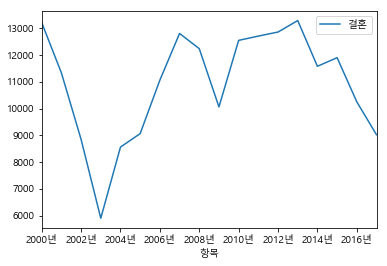

In [366]:
df1.plot()
plt.show()